In [ ]:
import skeliner as sk
import trimesh
from pathlib import Path

import matplotlib.pyplot as plt


In [2]:
MESH_PATH = Path("../data/720575940545220339.obj")
mesh = trimesh.load(MESH_PATH, process=False)

In [3]:
skel = sk.skeletonize(mesh, 
    probe_mult=10.0,
    density_frac=0.30,
    grow_steps=1,
)

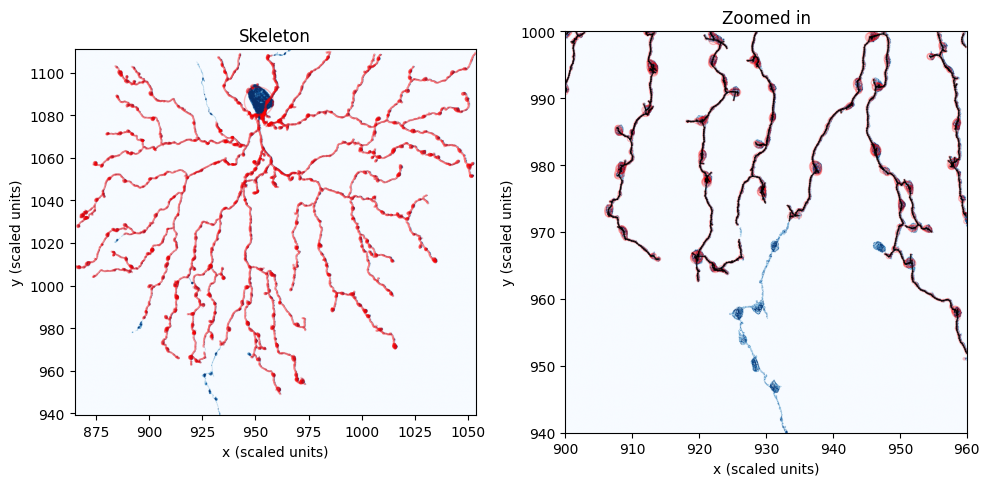

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sk.plot2d(
    skel, mesh,
    plane="xy",
    scale=1e-3, # nm → µm 
    draw_edges=False,
    ax=ax[0]
)
sk.plot2d(
    skel, mesh,
    plane="xy",
    scale=1e-3,  
    xlim=(900, 960),
    ylim=(940, 1000),
    draw_edges=True,
    ax=ax[1]
)
ax[0].set_title("Skeleton")
ax[1].set_title("Zoomed in")

fig.tight_layout()

There are broken paths because the mesh is not fully connected and there are gaps nevertheless. To reconnect the broken paths, we need to treat each of the paths as an individual cell, and trace it the same way as before. This step can be handled by `sk.post.complete()`, which first find all seeds for the disconnected paths, then merge them back to the main skeleton.

In [5]:
skel_merged = sk.post.complete(mesh, skel,
                cover_mult=1.5,
                seed_r = 200.0,
                lam = 1.0,
                collapse_dist = 0.0,
            )

Found 8 extra component(s)
  ↳ tracing component 1
  ↳ tracing component 2
  ↳ tracing component 3
  ↳ tracing component 4
  ↳ tracing component 5
  ↳ tracing component 6
  ↳ tracing component 7
  ↳ tracing component 8
  ↳ merged into 9611 nodes


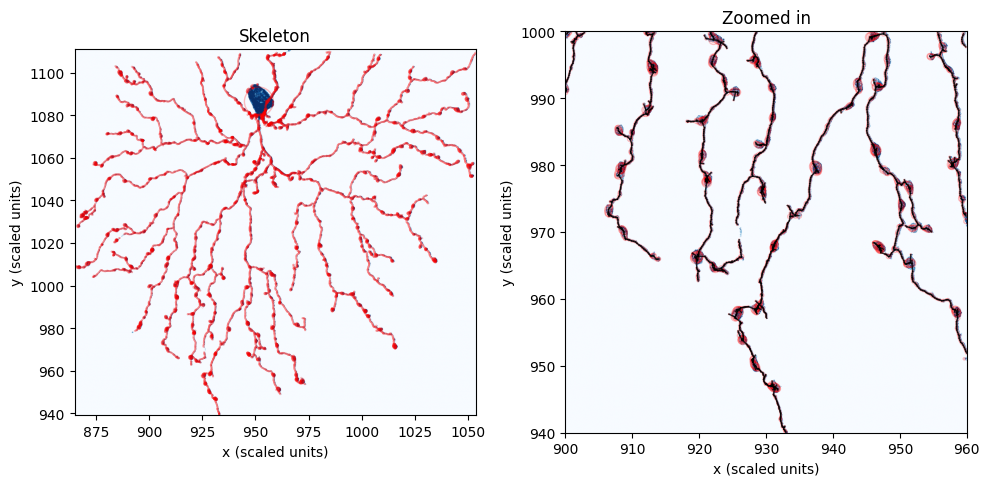

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sk.plot2d(
    skel_merged, mesh,
    plane="xy",
    scale=1e-3, # skel already in µm, mesh: nm → µm
    draw_edges=False,
    ax=ax[0]
)
sk.plot2d(
    skel_merged, mesh,
    plane="xy",
    scale=1e-3,  
    xlim=(900, 960),
    ylim=(940, 1000),
    draw_edges=True,
    ax=ax[1]
)
ax[0].set_title("Skeleton")
ax[1].set_title("Zoomed in")

fig.tight_layout()

In [7]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-05-16 13:56:08CEST

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 9.2.0

trimesh   : 4.6.9
skeliner  : 0.1.0
numpy     : 2.2.5
matplotlib: 3.10.3

Watermark: 2.5.0

